In [1]:
import pandas as pd
import numpy as np


In [2]:
import joblib
scaler = joblib.load('scaler_RELIANCE.save')

In [3]:

# Load the filtered dataset
df_filtered = pd.read_csv('df_for_gru_scaled_RELIANCE.csv')
print(df_filtered.columns)
# 3. Drop only rows with NaNs (preserve all numeric columns, including 'Close')
df_filtered.dropna(inplace=True)

# 4. Convert all numeric columns to float32
df_filtered = df_filtered.astype('float32')

# 5. Final check
print(df_filtered.dtypes)
print(df_filtered.head())

Index(['High_RELIANCE.NS', 'Low_RELIANCE.NS', 'Volume_RELIANCE.NS', 'sma7',
       'sma21', 'rsi', 'bollinger_mavg', 'bollinger_low', 'stoch_k', 'obv',
       'return_1d', 'return_5d', 'Close'],
      dtype='object')
High_RELIANCE.NS      float32
Low_RELIANCE.NS       float32
Volume_RELIANCE.NS    float32
sma7                  float32
sma21                 float32
rsi                   float32
bollinger_mavg        float32
bollinger_low         float32
stoch_k               float32
obv                   float32
return_1d             float32
return_5d             float32
Close                 float32
dtype: object
   High_RELIANCE.NS  Low_RELIANCE.NS  Volume_RELIANCE.NS      sma7     sma21  \
0          0.002103         0.005325            0.381006  0.000000  0.000000   
1          0.008740         0.019412            0.320045  0.006088  0.009345   
2          0.011561         0.018607            0.288580  0.009056  0.016883   
3          0.025168         0.018370            0.356560  0

In [4]:
print(df_filtered.columns)


Index(['High_RELIANCE.NS', 'Low_RELIANCE.NS', 'Volume_RELIANCE.NS', 'sma7',
       'sma21', 'rsi', 'bollinger_mavg', 'bollinger_low', 'stoch_k', 'obv',
       'return_1d', 'return_5d', 'Close'],
      dtype='object')


In [5]:
def create_sequence(data, target_col='Close', seq_len=30):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data.iloc[i:i+seq_len].drop(columns=target_col).values)
        y.append(data.iloc[i+seq_len][target_col])
    return np.array(X, dtype='float32'), np.array(y, dtype='float32')

# Create input sequences and targets
X_gru, y_gru = create_sequence(df_filtered, target_col='Close', seq_len=30)

print("X_gru shape:", X_gru.shape)
print("y_gru shape:", y_gru.shape)


X_gru shape: (1187, 30, 12)
y_gru shape: (1187,)


In [6]:
split = int(0.8 * len(X_gru))
X_train, X_test = X_gru[:split], X_gru[split:]
y_train, y_test = y_gru[:split], y_gru[split:]
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (949, 30, 12) (949,)
Test: (238, 30, 12) (238,)


In [7]:
import tensorflow as tf
print(tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


2.16.2
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import tensorflow as tf

In [9]:

# Build model
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1)) 
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100


2025-03-29 17:50:31.119148: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-03-29 17:50:31.119173: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-03-29 17:50:31.119179: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-03-29 17:50:31.119198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-29 17:50:31.119208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/karishniikuber/Desktop/project_1/tf-env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0681 - val_loss: 0.0313
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - val_loss: 0.0249
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0035 - val_loss: 0.0125
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - val_loss: 0.0070
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2531e-04 - val_loss: 0.0019
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4922e-04 - val_loss: 0.0014
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4644e-04 - val_loss: 0.0013
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6732e-04 - val_loss: 0.0010
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4450e-04 - val_loss: 0.0014
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4170e-04 - val_loss: 6.8783e-04
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8m

In [10]:
print(X_train.dtype)
print(y_train.dtype)


float32
float32


In [11]:
# Predict on test set
y_pred = model.predict(X_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [12]:
dummy_pred = np.zeros((len(y_pred),df_filtered.shape[1]))
dummy_true = np.zeros((len(y_test),df_filtered.shape[1]))
close_idx = df_filtered.columns.get_loc('Close')
dummy_pred[:, close_idx] = y_pred[:, 0]
dummy_true[:, close_idx] = y_test
y_pred_inv = scaler.inverse_transform(dummy_pred)[:, close_idx]
y_test_inv = scaler.inverse_transform(dummy_true)[:, close_idx]

In [13]:
from sklearn.metrics import mean_squared_error, r2_score


# Just compute regular MSE and then take the square root
rmse = mean_squared_error(y_test_inv, y_pred_inv) ** 0.5
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R² Score: {r2:.4f}")


Test RMSE: 20.7848
Test R² Score: 0.9661


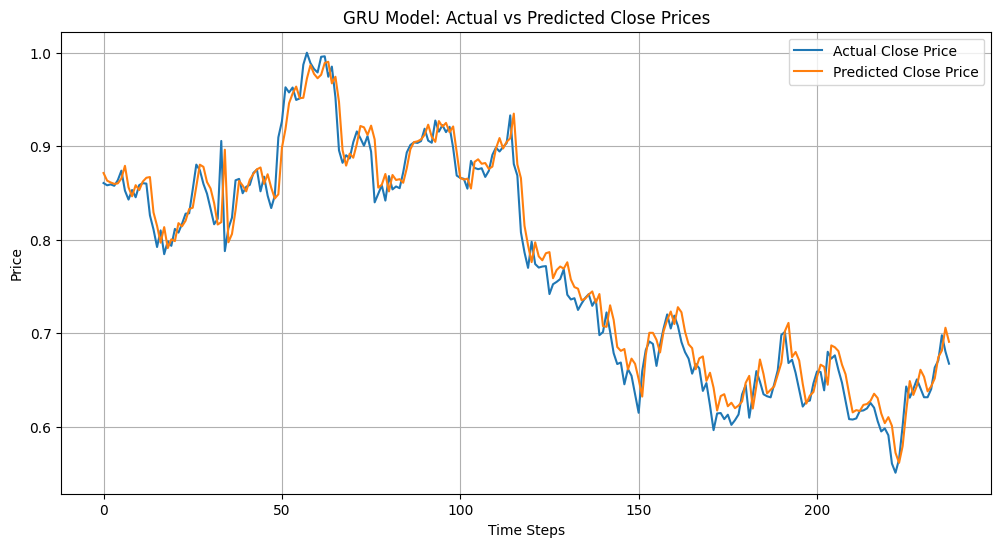

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title('GRU Model: Actual vs Predicted Close Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


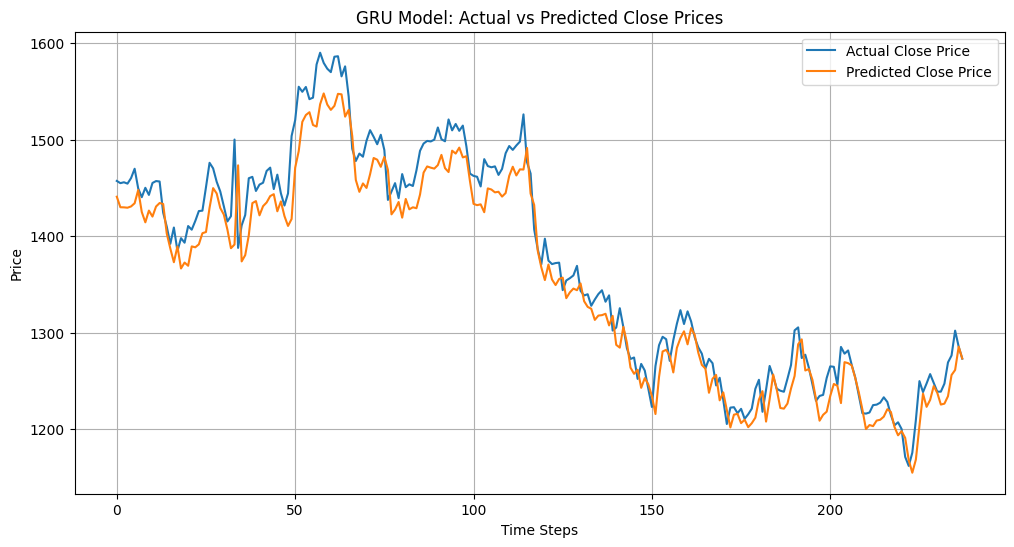

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price')
plt.title('GRU Model: Actual vs Predicted Close Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Predict next day's closing price
last_30 = df.drop(columns='Close').values[-30:]  # last 30 rows
last_30 = np.expand_dims(last_30, axis=0)        # shape = (1, 30, features)
next_scaled = model.predict(last_30)

# Inverse transform just like you did above
dummy_next = np.zeros((1, df.shape[1]))
dummy_next[0, close_idx] = next_scaled[0][0]
next_day_price = scaler.inverse_transform(dummy_next)[0][close_idx]

print(f"\033[92mNext predicted closing price for {ticker}: ₹{next_day_price:.2f}\033[0m")


NameError: name 'df' is not defined